In [46]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('churn_dataset.csv')

print(df.dtypes)
# for c in df.columns:
#     print(df[c].value_counts())

df

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop(columns=['customerID'], inplace=True)

In [4]:
mult_categorial_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaymentMethod']
df_mul_categorial = pd.get_dummies(df[mult_categorial_cols], drop_first=True)
for col in df_mul_categorial.columns:
    bool_to_int_mapping = {False: 0, True: 1}
    df_mul_categorial[col] = df_mul_categorial[col].map(bool_to_int_mapping)

df_mul_categorial

,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,1,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,0,0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
7040,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7041,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
df.drop(columns=mult_categorial_cols, inplace=True)

In [6]:
gender_mapping = {'Male': 0, 'Female': 1}
df['gender'] = df['gender'].map(gender_mapping)
df['gender'].value_counts()

gender
0    3555
1    3488
Name: count, dtype: int64

In [7]:
yes_no_mapping = {'No': 0, 'Yes': 1}
cols = ('Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn')
for col in cols:
    df[col] = df[col].map(yes_no_mapping)

In [8]:
def to_float(v):
    if v in ('', ' '):
        return 0.0
    return float(v)

df['TotalCharges'] = df['TotalCharges'].map(to_float)

In [9]:
print(df.dtypes)
df

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1,29.85,29.85,0
1,0,0,0,0,34,1,0,56.95,1889.50,0
2,0,0,0,0,2,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,42.30,1840.75,0
4,1,0,0,0,2,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0
7039,1,0,1,1,72,1,1,103.20,7362.90,0
7040,1,0,1,1,11,0,1,29.60,346.45,0
7041,0,1,1,0,4,1,1,74.40,306.60,1


In [10]:
# df.insert(9, 'MultipleLines_No phone service', df_mul_categorial['MultipleLines_No phone service'])
# df.insert(10, 'MultipleLines_Yes', df_mul_categorial['MultipleLines_Yes'])

for idx, col in enumerate(df_mul_categorial.columns):
    df.insert(9+idx, col, df_mul_categorial[col])

df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,1,0,1,0,1,29.85,29.85,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,2,1,1,53.85,108.15,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,45,0,0,42.30,1840.75,1,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,0,1,0,1,1,0,0,0,1,0
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,1,1,0,1,0,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,1,...,0,0,0,0,0,0,0,1,0,0
7041,0,1,1,0,4,1,1,74.40,306.60,0,...,0,0,0,0,0,0,0,0,1,1


In [11]:
print(df.dtypes)
df

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
MultipleLines_No phone service             int64
MultipleLines_Yes                          int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
OnlineBackup_No internet service           int64
OnlineBackup_Yes                           int64
DeviceProtection_No internet service       int64
DeviceProtection_Yes                       int64
TechSupport_No internet service            int64
TechSupport_Yes     

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,1,0,1,0,1,29.85,29.85,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,2,1,1,53.85,108.15,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,45,0,0,42.30,1840.75,1,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,84.80,1990.50,0,...,0,1,0,1,1,0,0,0,1,0
7039,1,0,1,1,72,1,1,103.20,7362.90,0,...,0,1,0,1,1,0,1,0,0,0
7040,1,0,1,1,11,0,1,29.60,346.45,1,...,0,0,0,0,0,0,0,1,0,0
7041,0,1,1,0,4,1,1,74.40,306.60,0,...,0,0,0,0,0,0,0,0,1,1


In [82]:
print(len(df.columns))
print(len(df))

31
7043


In [115]:
X_train = df.values[0:5000, 0:30]
y_train = df['Churn'].values[:5000]
X_test = df.values[5000:, 0:30]
y_test = df['Churn'].values[5000:]
# X_train = df.values[0:5000, 7:9]
# y_train = df['Churn'].values[:5000]
# X_test = df.values[5000:, 7:9]
# y_test = df['Churn'].values[5000:]

In [116]:
print(X_train.shape)
print(y_train, y_train.shape)
print(X_test.shape)
print(y_test, y_test.shape)

(5000, 30)
[0 0 1 ... 1 0 0] (5000,)
(2043, 30)
[0 1 0 ... 0 1 0] (2043,)


In [117]:
def normailize(v):
    assert len(v.shape) == 2
    return (v - v.mean(axis=0)) / v.std(axis=0)

X_train_norm = normailize(X_train)
X_test_norm = normailize(X_test)
X_train_norm

array([[ 1.01328828, -0.43578615,  1.03833424, ..., -0.52767927,
         1.41272994, -0.54221385],
       [-0.98688598, -0.43578615, -0.96308102, ..., -0.52767927,
        -0.70784937,  1.84429077],
       [-0.98688598, -0.43578615, -0.96308102, ..., -0.52767927,
        -0.70784937,  1.84429077],
       ...,
       [-0.98688598,  2.2947035 , -0.96308102, ..., -0.52767927,
         1.41272994, -0.54221385],
       [-0.98688598,  2.2947035 , -0.96308102, ..., -0.52767927,
        -0.70784937, -0.54221385],
       [ 1.01328828, -0.43578615,  1.03833424, ..., -0.52767927,
        -0.70784937,  1.84429077]])

In [118]:
def to_dataset(X, y):
    return tf.data.Dataset.from_tensor_slices(
        (tf.cast(X, tf.float32),
         tf.cast(y, tf.float32)))

ds_train_orig = to_dataset(X_train_norm, y_train)
ds_test = to_dataset(X_test_norm, y_test)
ds_train_orig

<TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [119]:
num_of_epochs = 50
training_size = len(y_train)
batch_size = 100
steps_per_epoch = np.ceil(training_size / batch_size)

tf.random.set_seed(1)
ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(batch_size)

In [120]:
it = iter(ds_train)
batch_x, batch_y = next(it)
print(batch_x)
print(batch_y)

tf.Tensor(
[[-0.98688596 -0.43578616 -0.963081   ... -0.52767926 -0.7078494
   1.8442907 ]
 [ 1.0132883  -0.43578616 -0.963081   ... -0.52767926  1.41273
  -0.54221386]
 [-0.98688596 -0.43578616 -0.963081   ... -0.52767926 -0.7078494
   1.8442907 ]
 ...
 [-0.98688596 -0.43578616 -0.963081   ... -0.52767926 -0.7078494
   1.8442907 ]
 [-0.98688596 -0.43578616  1.0383343  ... -0.52767926 -0.7078494
   1.8442907 ]
 [-0.98688596 -0.43578616  1.0383343  ... -0.52767926  1.41273
  -0.54221386]], shape=(100, 30), dtype=float32)
tf.Tensor(
[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0.], shape=(100,), dtype=float32)


In [121]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='sigmoid', name='hidden1', input_shape=(30,)),
    # tf.keras.layers.Dense(30, activation='sigmoid', name='hidden1', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid', name='output'),
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 30)                930       
                                                                 
 output (Dense)              (None, 1)                 31        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer='adam',
              # loss='sparse_categorical_crossentropy',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [123]:
history = model.fit(ds_train, epochs=num_of_epochs,
                    steps_per_epoch=steps_per_epoch,
                    verbose=0)

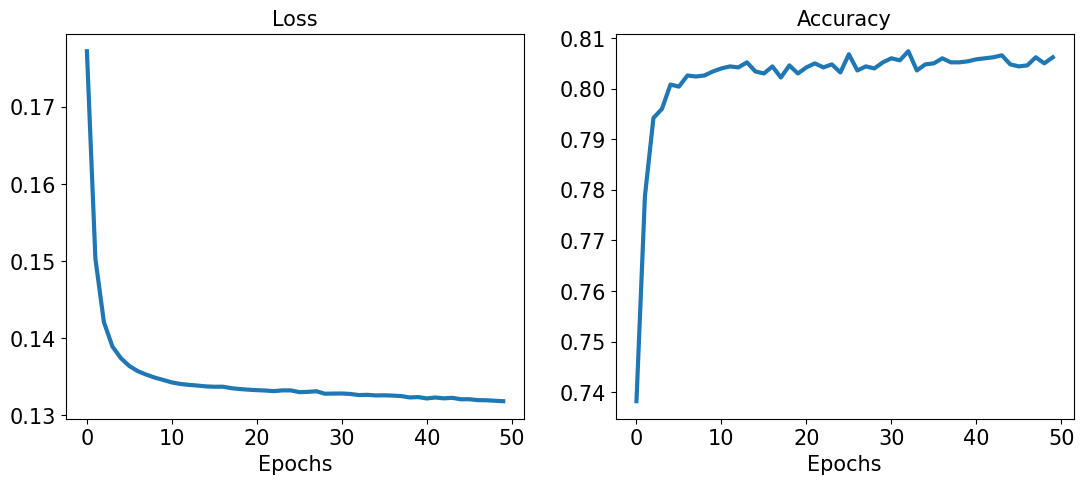

In [124]:
hist = history.history 

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Loss', size=15)
ax.set_xlabel('Epochs', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epochs', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [125]:
hist['accuracy']

[0.7382000088691711,
 0.7788000106811523,
 0.7942000031471252,
 0.7960000038146973,
 0.8008000254631042,
 0.8004000186920166,
 0.8026000261306763,
 0.8023999929428101,
 0.8026000261306763,
 0.8033999800682068,
 0.8040000200271606,
 0.8044000267982483,
 0.8041999936103821,
 0.8051999807357788,
 0.8033999800682068,
 0.8029999732971191,
 0.8044000267982483,
 0.8022000193595886,
 0.8046000003814697,
 0.8029999732971191,
 0.8041999936103821,
 0.8050000071525574,
 0.8041999936103821,
 0.8047999739646912,
 0.8032000064849854,
 0.8068000078201294,
 0.803600013256073,
 0.8044000267982483,
 0.8040000200271606,
 0.8051999807357788,
 0.8059999942779541,
 0.8055999875068665,
 0.8073999881744385,
 0.803600013256073,
 0.8047999739646912,
 0.8050000071525574,
 0.8059999942779541,
 0.8051999807357788,
 0.8051999807357788,
 0.805400013923645,
 0.8058000206947327,
 0.8059999942779541,
 0.8062000274658203,
 0.8065999746322632,
 0.8047999739646912,
 0.8044000267982483,
 0.8046000003814697,
 0.8062000274658

In [126]:
assert not np.any(np.isnan(y_train))
y_train

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [127]:
results = model.evaluate(ds_test.batch(100), verbose=0)
loss_test, accuracy_test = results
print('accuracy_test', accuracy_test)

accuracy_test 0.7993147373199463


In [129]:
model.save('churn-classifier.h5',
           overwrite=True,
           include_optimizer=True,
           save_format='h5')